In [111]:
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [164]:
list1=['day_period','id','month_year','used_energy_capacity_kVth','used_energy_cost_with_nds_rub']
data1 = pd.read_csv('ch.xackaton_po_bitovie_abon_nachisleniya_2019_2021-3f.csv',
                   usecols=list1,na_filter = False)

In [165]:
data1.head(2)
vi = 1000

In [166]:
clientl = list(data1.id.unique())
len(clientl)
from random import sample
clientl = sample(clientl,vi)
data1 = data1[data1.id.isin(clientl)]

In [167]:
len(data1.month_year.unique())
l1 =list(data1.month_year.unique())
l1 = np.sort(l1)
l1


array([2019.09, 2019.1 , 2019.11, 2019.12, 2020.01, 2020.02, 2020.03,
       2020.04, 2020.05, 2020.06, 2020.07, 2020.08, 2020.09, 2020.1 ,
       2020.11, 2020.12, 2021.01, 2021.02, 2021.03, 2021.04, 2021.05,
       2021.06, 2021.07, 2021.08, 2021.09])

In [168]:
def get_m(row):

    b = row.month_year
    if b <2020:
        return 1
    elif b <2020.05:
        return 2
    elif b < 2020.09:
        return 3
    elif b < 2021.01:
        return 4
    elif b < 2021.05:
        return 5
    elif b < 2021.09:
        return 6
    else:
        return 7

data1['kvartal'] = data1.apply(get_m, axis=1)
data1.kvartal.unique()

array([2, 6, 4, 3, 7, 1, 5])

In [169]:
len(clientl)

1000

In [170]:
client = pd.DataFrame(index=clientl)
client['tariff'] = 3

In [171]:
client['e_kv1'] = 0
client['e_kv2'] = 0
client['e_kv3'] = 0
client['e_kv4'] = 0
client['e_kv5'] = 0
client['e_kv6'] = 0
client['e_kv7'] = 0

client['p_kv1'] = 0
client['p_kv2'] = 0
client['p_kv3'] = 0
client['p_kv4'] = 0
client['p_kv5'] = 0
client['p_kv6'] = 0
client['p_kv7'] = 0

In [172]:
# client2=client.loc[g]
# client2.shape

In [173]:
for i in clientl:
    data3 = data1[(data1.id==i)]
    for j in list(range(1,8)):
        data2 = data3[(data3.kvartal==j)]
        client['e_kv'+str(j)][i] = np.mean(data2.used_energy_capacity_kVth)
        client['p_kv'+str(j)][i] = np.mean(data2.used_energy_cost_with_nds_rub)

In [174]:
del data1

In [175]:
list1=['day_period','id','month_year','used_energy_capacity_kVth','used_energy_cost_with_nds_rub','tariff']
data1 = pd.read_csv('ch.xackaton_po_bitovie_abon_nachisleniya_2019_2021-odn.csv',
                   usecols=list1,na_filter = False)

In [176]:
data1.head(2)

,day_period,id,month_year,tariff,used_energy_capacity_kVth,used_energy_cost_with_nds_rub
0,день,103794123,2021.03,однотарифная,40,226.40
1,день,103794126,2021.03,однотарифная,168,950.88


In [177]:

data1.shape

(127366379, 6)

In [178]:
clientl = list(data1.id.unique())
len(clientl)
from random import sample
clientl = sample(clientl,vi)
data1 = data1[data1.id.isin(clientl)]

In [179]:
# clientl1 = list(data1.id.unique())
# clientl1 = sample(clientl1,2984)
client1 = pd.DataFrame(index=clientl)
client1['tariff'] = 1
client1['e_kv1'] = 0
client1['e_kv2'] = 0
client1['e_kv3'] = 0
client1['e_kv4'] = 0
client1['e_kv5'] = 0
client1['e_kv6'] = 0
client1['e_kv7'] = 0

client1['p_kv1'] = 0
client1['p_kv2'] = 0
client1['p_kv3'] = 0
client1['p_kv4'] = 0
client1['p_kv5'] = 0
client1['p_kv6'] = 0
client1['p_kv7'] = 0

In [180]:
data1['kvartal']= data1.apply(get_m, axis=1)
data1.kvartal.unique()

array([5, 2, 6, 4, 7, 3, 1])

In [181]:
for i in clientl:
    data3 = data1[(data1.id==i)]
    for j in list(range(1,8)):
        data2 = data3[(data3.kvartal==j)]
        client1['e_kv'+str(j)][i] = np.mean(data2.used_energy_capacity_kVth)
        client1['p_kv'+str(j)][i] = np.mean(data2.used_energy_cost_with_nds_rub)

In [182]:
data1 =data2[(data1.used_energy_capacity_kVth>0)]
data1['price'] = data1.used_energy_cost_with_nds_rub/data1.used_energy_capacity_kVth
np.mean(data1.price)# цена квт однотариф
price1 = np.mean(data1.price)
price1

5.15

In [221]:
client.to_csv('client0.csv',index=True)
client1.to_csv('client1.csv',index=True)

In [184]:
# del data1
list1=['day_period','id','month_year','used_energy_capacity_kVth','used_energy_cost_with_nds_rub']
data1 = pd.read_csv('ch.xackaton_po_bitovie_abon_nachisleniya_2019_2021-dva.csv',
                   usecols=list1,na_filter = False)
print(data1.shape)

(65311937, 5)


In [185]:
clientl = list(data1.id.unique())
clientl = sample(clientl,vi)
data1 = data1[data1.id.isin(clientl)]

client2 = pd.DataFrame(index=clientl)
client2['tariff'] = 2
client2['e_kv1'] = 0
client2['e_kv2'] = 0
client2['e_kv3'] = 0
client2['e_kv4'] = 0
client2['e_kv5'] = 0
client2['e_kv6'] = 0
client2['e_kv7'] = 0

client2['p_kv1'] = 0
client2['p_kv2'] = 0
client2['p_kv3'] = 0
client2['p_kv4'] = 0
client2['p_kv5'] = 0
client2['p_kv6'] = 0
client2['p_kv7'] = 0
data1['kvartal']= data1.apply(get_m, axis=1)
data1.kvartal.unique()

array([7, 4, 6, 5, 3, 1, 2])

In [186]:
for i in clientl:
    data3 = data1[(data1.id==i)]
    for j in list(range(1,8)):
        data2 = data3[(data3.kvartal==j)]
        client2['e_kv'+str(j)][i] = np.mean(data2.used_energy_capacity_kVth)
        client2['p_kv'+str(j)][i] = np.mean(data2.used_energy_cost_with_nds_rub)

In [187]:
data2=data1[data1.day_period=='день']
data2 =data2[(data2.used_energy_capacity_kVth>0)]
data2['price'] = data2.used_energy_cost_with_nds_rub/data2.used_energy_capacity_kVth
pice21=np.mean(data2.price)# цена квт однотариф

data2=data1[data1.day_period=='ночь']
data2 =data2[(data2.used_energy_capacity_kVth>0)]
data2['price'] = data2.used_energy_cost_with_nds_rub/data2.used_energy_capacity_kVth
pice22=np.mean(data2.price)# цена квт однотариф
print(pice21,pice22)

5.347208075718941 1.8212030379401993


In [220]:
client2.to_csv('client2.csv')

In [189]:
def get_m1(row):

    b = np.mean([row.p_kv1,row.p_kv2,row.p_kv3,row.p_kv4,row.p_kv5,row.p_kv6,row.p_kv7])
    return b

client['al1'] = client.apply(get_m1, axis=1)
client1['al1'] = client1.apply(get_m1, axis=1)
client2['al1'] = client2.apply(get_m1, axis=1)

In [190]:
def get_m2(row):

    b = np.mean([row.e_kv1,row.e_kv2,row.e_kv3,row.e_kv4,row.e_kv5,row.e_kv6,row.e_kv7])
    return b

client['al_en'] = client.apply(get_m2, axis=1)
client1['al_en'] = client1.apply(get_m2, axis=1)
client2['al_en'] = client2.apply(get_m2, axis=1)

In [191]:

client['al2']=client['al1']
client['al3'] =client['al1']
client['al1']= client['al_en']*price1

client1['al2']=client1['al1']
client1['al3'] =client1['al1']

client2['al2']=client2['al1']
client2['al3'] =client2['al1']
client2['al1']= client2['al_en']*price1   

In [192]:
# del data1
list1=['day_period','id','month_year','used_energy_capacity_kVth','used_energy_cost_with_nds_rub']
data1 = pd.read_csv('ch.xackaton_po_bitovie_abon_nachisleniya_2019_2021-3f.csv',
                   usecols=list1,na_filter = False)

In [193]:
cl_ind = client.index
for i in cl_ind:
    data3 = data1[data1.id==i]
    c1 = data3[data3.day_period=='ночь']
    
    c11 = np.mean(c1.used_energy_capacity_kVth)
    
    c2 = data3[data3.day_period!='ночь']
    c22 = np.mean(c2.used_energy_capacity_kVth)
    client['al2'][i] = c22*pice21 +c11*pice22
del data1

In [194]:
#client.dropna(inplace=True)
client

,tariff,e_kv1,e_kv2,e_kv3,e_kv4,e_kv5,e_kv6,e_kv7,p_kv1,p_kv2,p_kv3,p_kv4,p_kv5,p_kv6,p_kv7,al1,al_en,al2,al3
22023381,3,59.000000,66.000000,58.000000,58.000000,62.000000,69.000000,57.000000,265.000000,296.0000,273.000000,284.000000,311.000000,341.000000,287.000000,315.621429,61.285714,443.452849,293.857143
154596489,3,33.000000,33.000000,104.000000,40.000000,40.000000,40.000000,40.000000,157.000000,156.0000,678.000000,213.000000,213.000000,218.000000,224.000000,242.785714,47.142857,368.868692,265.571429
166812315,3,99.000000,24.000000,96.000000,56.000000,85.000000,74.000000,85.000000,403.000000,106.0000,439.000000,248.000000,387.000000,334.000000,406.000000,381.835714,74.142857,539.931375,331.857143
57027288,3,30.000000,166.000000,66.000000,134.000000,261.000000,227.000000,92.000000,168.000000,813.0000,316.000000,671.000000,1323.000000,1122.000000,453.000000,718.057143,139.428571,1100.336129,695.142857
271866180,3,38.000000,36.000000,42.000000,24.000000,23.000000,30.000000,26.000000,165.000000,155.0000,181.000000,107.000000,100.000000,139.000000,124.000000,161.121429,31.285714,240.963475,138.714286
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
65148240,3,32.083333,26.833333,26.333333,25.916667,40.333333,31.416667,19.333333,151.062500,126.2650,129.108333,133.940833,221.488333,168.233333,100.500000,148.798214,28.892857,220.521668,147.228333
72618069,3,45.750000,72.333333,62.166667,-5.916667,3.250000,26.000000,29.666667,176.666667,294.5900,257.997500,-24.414167,7.997500,110.218333,124.423333,171.605357,33.321429,243.642169,135.354167
130812411,3,40.000000,18.833333,44.083333,34.333333,20.000000,34.000000,29.333333,156.700000,71.1475,174.078333,139.860000,85.831667,141.867500,128.166667,162.286310,31.511905,228.457602,128.235952
181419345,3,103.333333,121.666667,138.000000,110.333333,100.000000,116.666667,121.333333,428.750000,507.0750,560.256667,464.840833,411.333333,495.301667,537.516667,596.909524,115.904762,835.980204,486.439167


In [195]:
client.columns

Index(['tariff', 'e_kv1', 'e_kv2', 'e_kv3', 'e_kv4', 'e_kv5', 'e_kv6', 'e_kv7',
       'p_kv1', 'p_kv2', 'p_kv3', 'p_kv4', 'p_kv5', 'p_kv6', 'p_kv7', 'al1',
       'al_en', 'al2', 'al3'],
      dtype='object')

In [199]:
client2.dropna(inplace=True)

In [200]:
client.dropna(inplace=True)
client1.dropna(inplace=True)

In [201]:

listt=['e_kv1', 'e_kv2', 'e_kv3', 'e_kv4', 'e_kv5', 'e_kv6', 'e_kv7']
from sklearn.cluster import KMeans
import numpy as np
kmeans2 = KMeans(n_clusters=10, random_state=11).fit(client2[listt])

client2['clasters']=kmeans2.predict(client2[listt])

client1['clasters'] = kmeans2.predict(client1[listt])
for i in range(10):
    ds = np.mean(client2[client2.clasters==i].al2/client2[client2.clasters==i].al_en)
    ind = client1[client1.clasters==i].index
    client1['al2'][ind] =  ds *client1['al_en'][ind]
    


In [202]:
client.head(5)

,tariff,e_kv1,e_kv2,e_kv3,e_kv4,e_kv5,e_kv6,e_kv7,p_kv1,p_kv2,p_kv3,p_kv4,p_kv5,p_kv6,p_kv7,al1,al_en,al2,al3
22023381,3,59.0,66.0,58.0,58.0,62.0,69.0,57.0,265.0,296.0,273.0,284.0,311.0,341.0,287.0,315.621429,61.285714,443.452849,293.857143
154596489,3,33.0,33.0,104.0,40.0,40.0,40.0,40.0,157.0,156.0,678.0,213.0,213.0,218.0,224.0,242.785714,47.142857,368.868692,265.571429
166812315,3,99.0,24.0,96.0,56.0,85.0,74.0,85.0,403.0,106.0,439.0,248.0,387.0,334.0,406.0,381.835714,74.142857,539.931375,331.857143
57027288,3,30.0,166.0,66.0,134.0,261.0,227.0,92.0,168.0,813.0,316.0,671.0,1323.0,1122.0,453.0,718.057143,139.428571,1100.336129,695.142857
271866180,3,38.0,36.0,42.0,24.0,23.0,30.0,26.0,165.0,155.0,181.0,107.0,100.0,139.0,124.0,161.121429,31.285714,240.963475,138.714286


In [203]:

listt=['e_kv1', 'e_kv2', 'e_kv3', 'e_kv4', 'e_kv5', 'e_kv6', 'e_kv7']
kmeans3 = KMeans(n_clusters=10, random_state=11).fit(client[listt])

client['clasters']=kmeans3.predict(client[listt])

client1['clasters'] = kmeans2.predict(client1[listt])
client2['clasters'] = kmeans2.predict(client2[listt])
for i in range(10):
    ds = np.mean(client[client.clasters==i].al3/client[client.clasters==i].al_en)
    ind = client1[client1.clasters==i].index
    client1['al3'][ind] = ds *client1['al_en'][ind]
    
    ind = client2[client2.clasters==i].index
    client2['al3'][ind] = ds *client2['al_en'][ind]
    

In [204]:
client2.head(5)

,tariff,e_kv1,e_kv2,e_kv3,e_kv4,e_kv5,e_kv6,e_kv7,p_kv1,p_kv2,p_kv3,p_kv4,p_kv5,p_kv6,p_kv7,al1,al_en,al2,al3,clasters
110895675,2,117.0,142.000,99.500,123.125,120.000,75.0,134.0,481.57500,584.04375,411.23500,539.13625,531.06500,352.0,638.0,596.388393,115.803571,505.293571,459.969811,9
257526060,2,100.0,113.625,105.375,106.500,106.500,221.0,145.0,472.43750,535.70625,515.36125,530.89500,527.42125,1052.0,739.0,660.671429,128.285714,624.688750,509.548669,9
122997012,2,133.5,146.000,162.875,147.375,141.750,135.0,162.0,501.18750,561.94500,620.80875,581.78625,556.92375,519.0,705.0,756.682143,146.928571,578.093036,583.597780,9
155805378,2,204.5,130.250,124.875,128.125,110.875,101.0,113.0,805.30500,517.69875,515.72125,534.01250,454.13375,424.0,500.0,671.431250,130.375000,535.838750,517.847277,9
123804258,2,98.0,114.750,97.875,97.250,64.500,103.0,93.0,369.35625,437.25375,377.06500,380.63500,272.49250,436.0,390.0,491.733036,95.482143,380.400357,438.567990,0


In [205]:
def get_m3(row):

    b = 1+np.argmin([row.al1,row.al2,row.al3])
    return b

client['best_tariff'] = client.apply(get_m3, axis=1)
client2['best_tariff'] = client2.apply(get_m3, axis=1)
client1['best_tariff'] = client1.apply(get_m3, axis=1)

In [218]:
g = pd.concat([client[['tariff','best_tariff']],client1[['tariff','best_tariff']],client2[['tariff','best_tariff']]])
g.to_csv('rec_nn_tarif.csv')

In [219]:
g

,tariff,best_tariff
22023381,3,3
154596489,3,1
166812315,3,3
57027288,3,3
271866180,3,3
...,...,...
44586378,2,3
102129474,2,2
149952819,2,2
294480327,2,3


In [208]:
client

,tariff,e_kv1,e_kv2,e_kv3,e_kv4,e_kv5,e_kv6,e_kv7,p_kv1,p_kv2,...,p_kv4,p_kv5,p_kv6,p_kv7,al1,al_en,al2,al3,clasters,best_tariff
22023381,3,59.000000,66.000000,58.000000,58.000000,62.000000,69.000000,57.000000,265.000000,296.0000,...,284.000000,311.000000,341.000000,287.000000,315.621429,61.285714,443.452849,293.857143,0,3
154596489,3,33.000000,33.000000,104.000000,40.000000,40.000000,40.000000,40.000000,157.000000,156.0000,...,213.000000,213.000000,218.000000,224.000000,242.785714,47.142857,368.868692,265.571429,3,1
166812315,3,99.000000,24.000000,96.000000,56.000000,85.000000,74.000000,85.000000,403.000000,106.0000,...,248.000000,387.000000,334.000000,406.000000,381.835714,74.142857,539.931375,331.857143,0,3
57027288,3,30.000000,166.000000,66.000000,134.000000,261.000000,227.000000,92.000000,168.000000,813.0000,...,671.000000,1323.000000,1122.000000,453.000000,718.057143,139.428571,1100.336129,695.142857,4,3
271866180,3,38.000000,36.000000,42.000000,24.000000,23.000000,30.000000,26.000000,165.000000,155.0000,...,107.000000,100.000000,139.000000,124.000000,161.121429,31.285714,240.963475,138.714286,3,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
65148240,3,32.083333,26.833333,26.333333,25.916667,40.333333,31.416667,19.333333,151.062500,126.2650,...,133.940833,221.488333,168.233333,100.500000,148.798214,28.892857,220.521668,147.228333,3,3
72618069,3,45.750000,72.333333,62.166667,-5.916667,3.250000,26.000000,29.666667,176.666667,294.5900,...,-24.414167,7.997500,110.218333,124.423333,171.605357,33.321429,243.642169,135.354167,3,3
130812411,3,40.000000,18.833333,44.083333,34.333333,20.000000,34.000000,29.333333,156.700000,71.1475,...,139.860000,85.831667,141.867500,128.166667,162.286310,31.511905,228.457602,128.235952,3,3
181419345,3,103.333333,121.666667,138.000000,110.333333,100.000000,116.666667,121.333333,428.750000,507.0750,...,464.840833,411.333333,495.301667,537.516667,596.909524,115.904762,835.980204,486.439167,4,3


In [212]:
list1 = ['e_kv1', 'e_kv2', 'e_kv3', 'e_kv4', 'e_kv5', 'e_kv6', 'e_kv7',
       'p_kv1', 'p_kv2', 'p_kv3', 'p_kv4', 'p_kv5', 'p_kv6', 'p_kv7', 'al1',
       'al_en']
client11 = client1[list1]
d0 = np.mean(client11[['e_kv1', 'e_kv2', 'e_kv3', 'e_kv4', 'e_kv5', 'e_kv6', 'e_kv7']])
dq0 = np.mean(client11[['p_kv1', 'p_kv2', 'p_kv3', 'p_kv4', 'p_kv5', 'p_kv6', 'p_kv7']])

In [213]:
list1 = ['e_kv1', 'e_kv2', 'e_kv3', 'e_kv4', 'e_kv5', 'e_kv6', 'e_kv7',
       'p_kv1', 'p_kv2', 'p_kv3', 'p_kv4', 'p_kv5', 'p_kv6', 'p_kv7', 'al1',
       'al_en']
client11 = client2[list1]
d1 = np.mean(client11[['e_kv1', 'e_kv2', 'e_kv3', 'e_kv4', 'e_kv5', 'e_kv6', 'e_kv7']])
dq1 = np.mean(client11[['p_kv1', 'p_kv2', 'p_kv3', 'p_kv4', 'p_kv5', 'p_kv6', 'p_kv7']])

In [214]:
list1 = ['e_kv1', 'e_kv2', 'e_kv3', 'e_kv4', 'e_kv5', 'e_kv6', 'e_kv7',
       'p_kv1', 'p_kv2', 'p_kv3', 'p_kv4', 'p_kv5', 'p_kv6', 'p_kv7', 'al1',
       'al_en']
client11 = client[list1]
d2 = np.mean(client11[['e_kv1', 'e_kv2', 'e_kv3', 'e_kv4', 'e_kv5', 'e_kv6', 'e_kv7']])
dq2 = np.mean(client11[['p_kv1', 'p_kv2', 'p_kv3', 'p_kv4', 'p_kv5', 'p_kv6', 'p_kv7']])

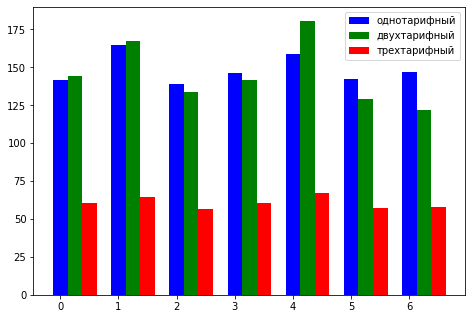

In [215]:
dataq = [d0,d1,d2]
dataq2 = [dq0,dq1,dq2]
X = np.arange(7)
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
ax.bar(X + 0.00, dataq[0], color = 'b', width = 0.25)
ax.bar(X + 0.25, dataq[1], color = 'g', width = 0.25)
ax.bar(X + 0.50, dataq[2], color = 'r', width = 0.25)
ax.legend(labels=['однотарифный', 'двухтарифный','трехтарифный'])
plt.show()